In [2]:
import os
import math
import warnings
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output

warnings.filterwarnings("ignore")

In [3]:
def load(file_name, header=None) -> pd.DataFrame:
    """Loading dataset
    @param file_name: user input dataset
    @return: dataset
    """
    if os.path.exists(file_name) == False:
        raise ValueError("Entered File is not found")
    if os.path.isdir(file_name):
        raise ValueError("Entered string is a directory")
    if header == False:
        return pd.read_csv(file_name, header=None)
    return pd.read_csv(file_name)

def copy_df(df) -> pd.DataFrame:
    """copy df to new temp df
    @param df: user input dataset
    @return: new df
    """
    return df.copy(deep=True)

def normalize_missing_values(dataset) -> pd.DataFrame:
    """normalize dataset missing values with mean for numerical columns
    @param dataset: user input dataset
    @return: normalized dataset
    """
    for col in dataset.columns:
        # print("column: ",col, "type: ", dataset[col].dtype)
        if dataset[col].dtype == 'object':
            dataset[col] = dataset[col].fillna(method='bfill')
        else:
            dataset[col] = dataset[col].fillna(dataset[col].mean()) 
    return dataset

def print_dataset(dataset):
    """print dataset inforamtion
    @param dataset: user input dataset
    @return: print dataset information via head(), info(), shape()
    """
    print(dataset.head())
    print(dataset.info())
    print(dataset.describe())
    print(dataset.columns)
    print(dataset.iloc[:, -1].value_counts())

def dummy_variable_indicator(data, column_name) -> pd.DataFrame:
    """dummy variable indicator
    @param data: user input data
    @param column_name: column name
    @return: data with dummy variable indicator
    """
    if column_name not in data.columns:
        raise ValueError("Column not found")
    data = pd.get_dummies(data, columns=[column_name])
    return data

def remove_column(data, column_name) -> pd.DataFrame:
    """remove column
    @param data: user input data
    @param column_name: column name
    @return: data without column
    """
    if column_name not in data.columns:
        raise ValueError("Column not found")
    data = data.drop(column_name, axis=1)
    return data

def normalize_numerical_columns(data) -> pd.DataFrame:
    """normalize numerical columns to 0-1 scale
    @param data: user input data
    @return: normalized data
    """
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    return data

def concat_data(x_data, y_data) -> list:
    """
    @param x_data: feature data
    @param y_data: label data
    @return: concatenation of features and label data
    """
    return pd.concat([x_data, y_data], axis=1)

def train_test_split(data, train_size=None, test_size=None, random_state=None, shuffle=None) -> tuple:
    """split dataset into train, validation and test
    @param data: user input dataset
    @param train_size: user input train size
    @param test_size: user input test size
    @param random_state: user input random state
    @return: train, validation and test dataset
    """
    if train_size is None and test_size is None:
        raise ValueError("train_size and test_size can not be both None")
    if train_size is not None and test_size is not None and train_size + test_size > 1:
        raise ValueError("train_size and test_size sum must be equal to 1")
    if train_size is not None and test_size is not None and train_size + test_size < 1:
        raise ValueError("train_size and test_size sum is not equal to one")
    if train_size is not None:
        if train_size <= 0:
            raise ValueError("train_size must be greater than 0")
        if train_size >= 1:
            raise ValueError("train_size must be less than 1")
        if test_size is None:
            test_size = 1 - train_size
        elif test_size <= 0:
            raise ValueError("test_size must be greater than 0")
        elif test_size >= 1:
            raise ValueError("test_size must be less than 1")
    if test_size is not None:
        if test_size <= 0:
            raise ValueError("test_size must be greater than 0")
        if test_size >= 1:
            raise ValueError("test_size must be less than 1")
        if train_size is None:
            train_size = 1 - test_size
        elif train_size <= 0:
            raise ValueError("train_size must be greater than 0")
        elif train_size >= 1:
            raise ValueError("train_size must be less than 1")
    train_size = int(len(data) * train_size)
    test_size = int(len(data) * test_size)
    if shuffle is True:
        data = data.sample(frac=1).reset_index(drop=True)
    
    # print("train_size: ", train_size, "test_size: ", test_size, 'sum: ', train_size + test_size)
    train_index = np.random.choice(len(data), train_size, replace=False)
    
    # split train data
    x_train = data.iloc[train_index, :-1].reset_index(drop=True)
    # x_train = data.drop(, axis=1).iloc[train_index].reset_index(drop=True)
    y_train = data.iloc[train_index, -1:].reset_index(drop=True)
    
    # differnetiate train indexes from whole data indexes
    test_index = np.setdiff1d(np.arange(len(data)), train_index)

    # split test data
    x_test = data.iloc[test_index, :-1].reset_index(drop=True)
    # x_test = data.drop('median_house_value', axis=1).iloc[test_index].reset_index(drop=True)
    y_test = data.iloc[test_index, -1:].reset_index(drop=True)
    return x_train, y_train, x_test, y_test

def k_fold(data, k_fold_number):
    pass
#     x_train_list, x_test_list, y_train_list, y_test_list, x_validation_list, y_validation_list  = [], [], [], [], [], []
#     for _ in range(k_fold_number):
#         intermediate_data = copy_df(data)

#         # split data into train, validation and test
#         x_train, y_train, x_validation_test, y_validation_test = train_test_split(intermediate_data, train_size=.6, shuffle=True)
#         x_validation, y_validation, x_test, y_test = train_test_split(concat_data(x_validation_test, y_validation_test), test_size=.5, shuffle=True)

#         x_train_list.append(x_train)
#         x_test_list.append(x_test)
#         y_train_list.append(y_train)
#         y_test_list.append(y_test)
#         x_validation_list.append(x_validation)
#         y_validation_list.append(y_validation)
#     return x_train_list, y_train_list, x_test_list, y_test_list, x_validation_list, y_validation_list

# def print_k_fold_data(x_train_list, y_train_list, x_test_list, y_test_list, x_validation_list, y_validation_list):
#     """print k-fold data
#     @param x_train_list: train data
#     @param y_train_list: train label 
#     @param x_test_list: test data
#     @param y_test_list: test label 
#     @param x_validation_list: validation data
#     @param y_validation_list: validation label 
#     """
#     k_fold_number = len(x_train_list)
#     for index in range(k_fold_number):
#         print("================== K-fold {} ==================".format(index + 1))
#         print("x_train_list[", index, "]: ", x_train_list[index].shape, "y_train_list[", index, "]: ", y_train_list[index].shape)
#         print("x_validation_list[", index, "]: ", x_validation_list[index].shape, "y_validation_list[", index, "]: ", y_validation_list[index].shape)
#         print("x_test_list[", index, "]: ", x_test_list[index].shape, "y_test_list[", index, "]: ", y_test_list[index].shape)
#         print(f"sum: {x_train_list[index].shape[0] + x_validation_list[index].shape[0] + x_test_list[index].shape[0]}")

def reshape_to_1d(*arrays):
    """
    Reshape all arrays to 1D
    @param arrays: input arrays
    @return: reshaped arrays
    """
    return [np.reshape(array, (array.shape[0],)) for array in arrays]

def print_hypothesis(x_data, theta):
    """Print hypothesis
    @param x_data: x_data
    @param theta: wights
    """
    H_x = "H(x) = " + "{:.2f}".format(theta[0]) + " + "
    for index in range(1, x_data.shape[1]):
        if (index+1) != x_data.shape[1]:
            H_x += "{:.2f}".format(theta[index]) + f"*x_{index} + "
        else:
            H_x += "{:.2f}".format(theta[index]) + f"*x_{index}"
    print(H_x)

def hypothesis(x_data, theta_or_weight):
    """Hypothesis function
    @param x_data: train data
    @param theta_or_weight: parameter
    """
    return np.dot(x_data, theta_or_weight)

def loss_function_with_regularization(x_data, y_data, theta, regularization_parameter):
    """Loss Function with regularization
    @param x_data: train data
    @param y_data: train label
    @param theta: weights
    @param regularization_parameter: lambda regularization parameter
    @return: loss function value
    """
    m_number_of_samples = x_data.shape[0]
    j_theta_1_mse_loss = np.sum(np.square(hypothesis(x_data, theta) - y_data)) / 2 * m_number_of_samples
    j_theta_2_regularization_loss = (regularization_parameter / (2 * m_number_of_samples)) * np.sum(np.square(theta))
    return j_theta_1_mse_loss + j_theta_2_regularization_loss

def loss_function(x_data, y_data, theta):
    """Loss Function without regularization
    @param x_data: train data
    @param y_data: train label
    @param theta: weights
    @return: loss function value
    """
    m_number_of_samples = x_data.shape[0]
    j_theta_1_mse_loss = np.sum(np.square(hypothesis(x_data, theta) - y_data)) / 2 * m_number_of_samples
    return j_theta_1_mse_loss

def gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter, alpha, max_iteration):
    """gradient_descent
    @param x_train: train data
    @param y_train: train label
    @param x_validation: validation data
    @param y_validation: validation label
    @param theta: wieghts
    @param regularization_paramet: lambda regularization parameter
    @param alpha: learning rate
    @param max_iteration: epochs
    @return: updated wieghts and loss function value
    """
    m_number_of_samples = x_train.shape[0]
    theta_dict = {}
    evaluation_with_validation_set_list = []

    with tqdm (total=max_iteration) as progress_bar:
        for iteration in range(max_iteration):
            hypothesis_value = hypothesis(x_train, theta)

            # updating θ_j with regularization
            for j_index in range(theta.shape[0]):
                if j_index != 0:
                    theta[j_index] -= alpha *  (1 / m_number_of_samples) * (np.dot(hypothesis_value - y_train, x_train[:, j_index]) + regularization_parameter * theta[j_index])
                else:
                    theta[j_index] -= alpha *  (1 / m_number_of_samples) * np.dot(hypothesis_value - y_train, x_train[:, j_index])

            evaluation_with_validation_set_list.append(loss_function_with_regularization(x_validation, y_validation, theta, regularization_parameter))
            theta_dict[iteration] = theta

            if len(evaluation_with_validation_set_list) >= 8:
                treshold_list = np.array(evaluation_with_validation_set_list[-8:])
                if treshold_list[-1 and -2 and -3 and -4 and -5 and -6 and -7] > treshold_list[-8]:

                    # if alpha > 1e-3:
                        # feedback = f"learning rate is too high, reducing it from {alpha}"
                        # alpha /= 2
                        # feedback += f" to {alpha} in iteration {iteration}"
                        # print(feedback)
                        # continue

                    print("iteration: ", iteration, "regularization_parameter: ", regularization_parameter, "alpha: ", alpha,  "loss: ", evaluation_with_validation_set_list[-1])
                    return theta, theta_dict, evaluation_with_validation_set_list

            if len(evaluation_with_validation_set_list) >= 10:
                plateau_list = np.array(evaluation_with_validation_set_list[-10:])
                if np.all(plateau_list == plateau_list[0]):

                    print("plateau: ", plateau_list)
                    # alpha *= 2
                    print("iteration: ", iteration, "regularization_parameter: ", regularization_parameter, "alpha: ", alpha,  "loss: ", evaluation_with_validation_set_list[-1])
                    return theta, theta_dict, evaluation_with_validation_set_list

            progress_bar.update(1)
        print("regularization_parameter: ", regularization_parameter, "alpha: ", alpha,  "loss: ", evaluation_with_validation_set_list[-1])
    return theta, theta_dict, evaluation_with_validation_set_list


# =============================== error functions ===============================
def calculate_r_squared(y_predict, y_test):
    """
    calculate r squared
    @param y_predict: predict value
    @param y_test: test value
    @return: r squared
    """
    return 1 - (np.sum(np.square(y_predict - y_test)) / np.sum(np.square(y_test - np.mean(y_test))))

def calculate_mse(y_predict, y_test):
    """
    calculate mse
    @param y_predict: predict value
    @param y_test: test value
    @return: mse
    """
    return np.sum(np.square(y_predict - y_test)) / y_test.shape[0]

def calculate_rmse(y_predict, y_test):
    """
    calculate rmse
    @param y_predict: predict value
    @param y_test: test value
    @return: rmse
    """
    return np.sqrt(calculate_mse(y_predict, y_test))

def calculate_mae(y_predict, y_test):
    """
    calculate mae
    @param y_predict: predict value
    @param y_test: test value
    @return: mae
    """
    return np.sum(np.abs(y_predict - y_test)) / y_test.shape[0]

def calculate_mape(y_predict, y_test):
    """
    calculate mape
    @param y_predict: predict value
    @param y_test: test value
    @return: mape
    """
    return np.sum(np.abs((y_predict - y_test) / y_test)) / y_test.shape[0]

def report_difference(y_predict, y_test):
    inter_report = pd.DataFrame({"y_predict": y_predict, "y_test": y_test})
    inter_report["difference"] = inter_report["y_predict"] - inter_report["y_test"]
    inter_report["difference_percentage"] = inter_report["difference"] / inter_report["y_test"]
    return inter_report

def report_difference_mean(report):
    return {"difference": np.round(report["difference"].mean(), 2), "difference_percentage": np.round(report["difference"].mean() / report["y_test"].mean(), 2)}

In [4]:
# print(">======================= Loading ====================<")
dataset = load("housing.csv")
# print(">====================================================<")

# print(">================= preprocessing ====================<")
# print(">============= handling missing values ==============<")
dataset = normalize_missing_values(dataset)
last_column = dataset[["median_house_value"]]
dataset = remove_column(dataset, "median_house_value")
# print(">====================================================<")

# print(">======= One-hot encoder for categorical data =======<")
dataset = dummy_variable_indicator(dataset, "ocean_proximity")
dataset = remove_column(dataset, "ocean_proximity_INLAND")
dataset = concat_data(dataset, last_column)
dataset_for_part_h = copy_df(dataset)
dataset = dataset.assign(median_house_value = dataset["median_house_value"] / dataset["median_house_value"].max())
last_column = dataset[["median_house_value"]]
dataset = remove_column(dataset, "median_house_value")
dataset = normalize_numerical_columns(dataset)
dataset = concat_data(dataset, last_column)

dataset.insert(0, "theta_0", np.ones(dataset.shape[0]))
feature_columns = dataset.drop('median_house_value', axis=1).columns
# print(">====================================================<")

# print(">=========== split data to 60% train,20% validation and 20% test ===========<")
x_train, y_train, x_validation_test, y_validation_test = train_test_split(copy_df(dataset), train_size=.6, shuffle=True)
x_validation, y_validation, x_test, y_test = train_test_split(concat_data(x_validation_test, y_validation_test), test_size=.5, shuffle=True)

# convert all data to np array
x_train, y_train, x_validation, y_validation, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation), np.array(x_test), np.array(y_test)

y_train, y_test, y_validation, = reshape_to_1d(y_train, y_test, y_validation)
# print(">===========================================================================<")

In [26]:
# print(">=================== Initialize model fitting ===================<")
theta = np.random.rand(x_train.shape[1]) # random values between 0 and 1 
# theta = np.random.rand(x_train.shape[1]) * 5 + 5 # random values between 5 and 10
# theta = np.random.rand(x_train.shape[1]) * 1 + 2 # random values between 2 and 3
regul_param_list = [0, 0.01, 0.1, 5, 10, 100]
alpha_list = [.1, .3, .5, .7, .9, 1]
max_iteration = 10000
# print(">===========================================================================<")

def report_gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter_list, alpha_list, max_iteration):
    theta_list = []
    loss_list = []
    report_data_frame = pd.DataFrame(columns=["regularization_parameter", "alpha", "theta_history", "loss"])
    counter = 0 
    for regularization_parameter in regularization_parameter_list:
        for alpha in alpha_list:
            theta_, theta_history, loss_histoy = gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter=regularization_parameter, alpha=alpha, max_iteration=max_iteration)
            loss_list.append(loss_histoy)
            theta_list.append({counter: [*theta_]})
            report_data_frame.loc[len(report_data_frame)] = [regularization_parameter, alpha, theta_history, loss_histoy]
            counter += 1

    return report_data_frame, theta_list, loss_list

report_df, theta_list, loss_list = report_gradient_descent(x_train, y_train, x_validation, y_validation, theta, regul_param_list, alpha_list, max_iteration)

  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0 alpha:  0.1 loss:  174899.57837732532


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0 alpha:  0.3 loss:  169542.31371590073


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0 alpha:  0.5 loss:  164284.07342423804


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0 alpha:  0.7 loss:  160075.2068131312


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0 alpha:  0.9 loss:  157181.32783682906


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0 alpha:  1 loss:  155534.18705259595


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0.01 alpha:  0.1 loss:  155426.64776641445


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0.01 alpha:  0.3 loss:  155147.3751079083


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0.01 alpha:  0.5 loss:  154780.8566190421


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0.01 alpha:  0.7 loss:  154416.09615652802


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0.01 alpha:  0.9 loss:  154109.51707836558


  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0.01 alpha:  1 loss:  153894.72374895363


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  2799 regularization_parameter:  0.1 alpha:  0.1 loss:  153891.09884545783


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  0.3 loss:  153891.09914037812


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  0.5 loss:  153891.10045030896


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  0.7 loss:  153891.1039972552


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  0.9 loss:  153891.11145398908


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  1 loss:  153891.12350455084


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  56 regularization_parameter:  5 alpha:  0.1 loss:  153890.7644600161


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  5 alpha:  0.3 loss:  153890.9261626223


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  5 alpha:  0.5 loss:  153891.6751993817


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  5 alpha:  0.7 loss:  153893.76354056597


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  5 alpha:  0.9 loss:  153898.25141231695


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  5 alpha:  1 loss:  153905.58900020077


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.1 loss:  153907.6939601687


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.3 loss:  153914.55950275387


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.5 loss:  153927.8838617987


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.7 loss:  153950.48403769135


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.9 loss:  153986.06597318238


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  1 loss:  154033.71541910825


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  100 alpha:  0.1 loss:  154103.8645054859


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  100 alpha:  0.3 loss:  154387.81058732327


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  100 alpha:  0.5 loss:  155090.54057527788


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  100 alpha:  0.7 loss:  156504.36157396776


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  100 alpha:  0.9 loss:  158943.25793921857


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  100 alpha:  1 loss:  162300.31372608172


In [27]:
# import subprocess

for index in range(len(report_df)):

    plt.figure(figsize=(12, 10))
    plt.plot(report_df.iloc[index]['loss'], label="loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.legend(["loss"], loc="upper left")
    plt.title("Loss graph - lambda: " + str(report_df.iloc[index]['regularization_parameter']) + " alpha: " + str(report_df.iloc[index]['alpha']))
    plt.savefig("./images/lambda_" + str(report_df.iloc[index]['regularization_parameter']) + "_alpha_" + str(report_df.iloc[index]['alpha']) + "_loss.png")
    # plt.show()
    plt.close()
    
    # unpacking theta_list[i] to coeff
    coeff = [*theta_list[index].values()][0]

    plt.figure(figsize=(12, 10))
    # plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Prediction') 
    plt.scatter(y_test, hypothesis(x_test, coeff), label="test")
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend(["Prediction"], loc="upper left")
    plt.title("Prediction - lambda: " + str(report_df.iloc[index]['regularization_parameter']) + " alpha: " + str(report_df.iloc[index]['alpha']))
    plt.savefig("./images/lambda_" + str(report_df.iloc[index]['regularization_parameter']) + "_alpha_" + str(report_df.iloc[index]['alpha']) + "_prediction.png")
    # plt.show()
    plt.close()

    plt.figure(figsize=(12, 10))
    plt.plot(range(len(coeff)), coeff, label="coefficient")
    plt.axhline(0, color='r', linestyle='solid')         # draw a horizontal line at y = 0
    plt.xticks(range(len(feature_columns)), feature_columns, rotation=90) # set the x ticks with names of columns
    plt.xlabel("feature")
    plt.ylabel("coefficents")
    plt.legend(["coefficients"], loc="upper left")
    plt.title("Coefficients - lambda: " + str(report_df.iloc[index]['regularization_parameter']) + " alpha: " + str(report_df.iloc[index]['alpha']))
    plt.savefig("./images/lambda_" + str(report_df.iloc[index]['regularization_parameter']) + "_alpha_" + str(report_df.iloc[index]['alpha']) + "_coefficient.png")
    # plt.show()
    plt.close()

# subprocess.call(["ffmpeg", "-framerate", "1", "-pattern_type", "glob", "-i", "*_coefficient.png", "-c:v", "libx264", "-pix_fmt", "yuv420p", "coefficient.mp4", "-y"])
# subprocess.call(["ffmpeg", "-framerate", "1", "-pattern_type", "glob", "-i", "*_prediction.png", "-c:v", "libx264", "-pix_fmt", "yuv420p", "prediction.mp4", "-y"])
# subprocess.call(["ffmpeg", "-framerate", "1", "-pattern_type", "glob", "-i", "*_loss.png", "-c:v", "libx264", "-pix_fmt", "yuv420p", "loss.mp4", "-y"])

# ffmpeg -framerate 1 -pattern_type glob -i "*_coefficient.png" -c:v libx264 -pix_fmt yuv420p coefficient.mp4 -y ; ffmpeg -framerate 1 -pattern_type glob -i "*_prediction.png" -c:v libx264 -pix_fmt yuv420p prediction.mp4 -y ; ffmpeg -framerate 1 -pattern_type glob -i "*_loss.png" -c:v libx264 -pix_fmt yuv420p loss.mp4 -y


print("[Done ☑]")


[Done ☑]


## Q1 - Part H

Error on test set: 
         mse      rmse       mae      mape  r_squared
0  0.021407  0.146311  0.105633  0.329554   0.624752


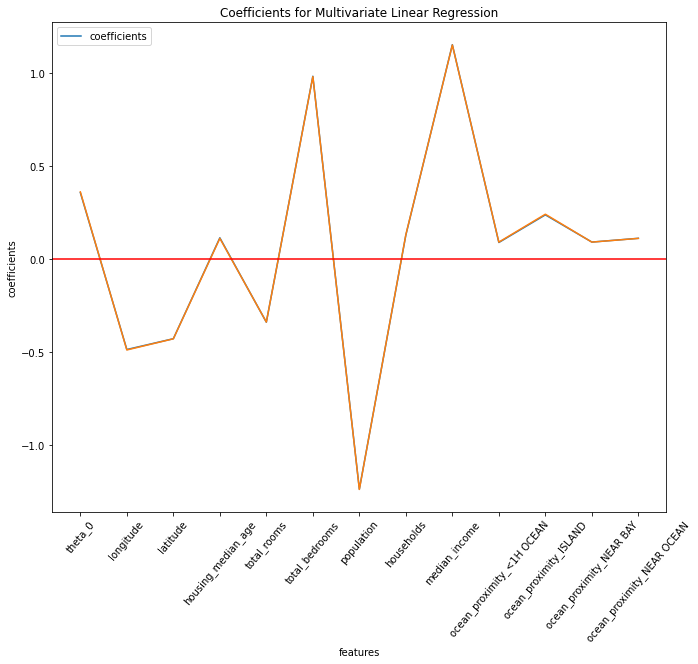

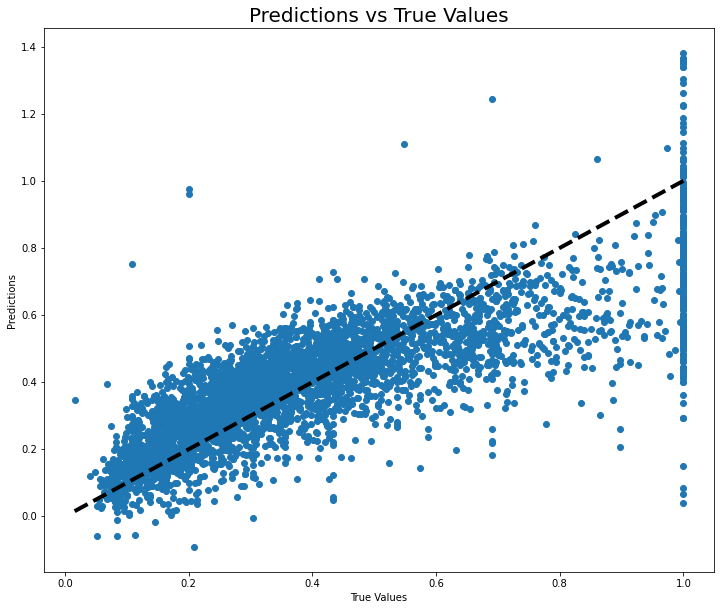

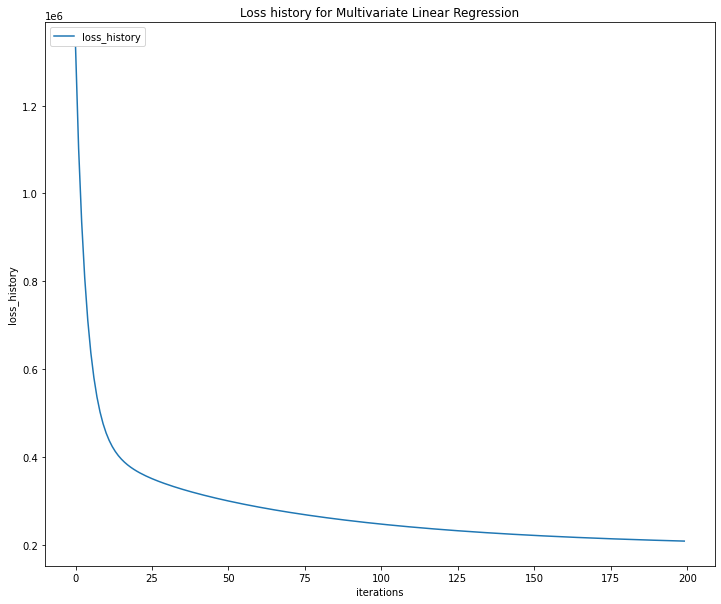

In [9]:
last_column_for_part_h = dataset_for_part_h[["median_house_value"]]
dataset_for_part_h = remove_column(dataset_for_part_h, "median_house_value")
dataset_for_part_h["population_per_household"] = dataset_for_part_h["population"] / dataset_for_part_h["households"]
dataset_for_part_h["rooms_per_household"] = dataset_for_part_h["total_rooms"] / dataset_for_part_h["households"]
dataset_for_part_h = concat_data(dataset_for_part_h, last_column_for_part_h)
dataset_for_part_h = normalize_numerical_columns(dataset_for_part_h)

y_predict = hypothesis(x_test, theta)
y_test = np.array(y_test).reshape(y_test.shape[0],)

report_error = pd.DataFrame({"mse": [calculate_mse(y_predict, y_test)], "rmse": [calculate_rmse(y_predict, y_test)], "mae": [
                            calculate_mae(y_predict, y_test)], "mape": [calculate_mape(y_predict, y_test)], "r_squared": [calculate_r_squared(y_predict, y_test)]})
print("Error on test set: \n", report_error)

# report = report_difference(y_predict, y_test)
# report_diff_mean = report_difference_mean(report)
# print(report)
# print("difference mean: ",report_diff_mean)
# print(theta_history[:10]) 

coeffs = pd.DataFrame({"theta": theta_history[-1], "coeff": theta_history[-1]})
coeffs["coeff"] = coeffs["coeff"].apply(lambda x: np.round(x, 2))
# print(coeffs)

# for i in range(10):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(y_test, hypothesis(x_test, theta_history[i]))
#     clear_output(wait=True)
#     plt.plot([y_test.min(), y_test.max()], [y_predict.min(), y_predict.max()], 'k--', lw=4)
#     # plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
#     plt.xlabel('True Values')
#     plt.ylabel('Predictions')
#     # save images in ./images 
#     plt.savefig("./images/plot_" + str(i) + ".png")

loss_function_with_last_theta = loss_function(x_train, y_train, theta_history[-1])

# rescale coeffs to 0-1 range
# coeffs["coeff"] = coeffs["coeff"].apply(lambda x: (x - min(coeffs["coeff"])) / (max(coeffs["coeff"]) - min(coeffs["coeff"])))

# ffmpeg -framerate 30 -pattern_type glob -i 'plot_*.png' -c:v libx264 -pix_fmt yuv420p out.mp4 ####30 fps####
# import subprocess
# subprocess.call(["ffmpeg", "-framerate", "30", "-pattern_type", "glob", "-i", "plot_*.png", "-c:v", "libx264", "-pix_fmt", "yuv420p", "out.mp4"])

# print(">===================== Figures =====================<")
# default plot
plt.figure(figsize=(11, 9))
plt.plot(range(len(coeffs)), coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)), feature_columns, rotation=50)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title("Coefficients for Multivariate Linear Regression")
plt.legend(["coefficients"], loc="upper left")
plt.show()

plt.figure(figsize=(12, 10))
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values', fontsize=20)
plt.show()

loss_histoy = loss_histoy[:200]

# use .1 of the loss_history for xticks and .1 of the loss_history for yticks
plt.figure(figsize=(12, 10))
plt.plot(range(len(loss_histoy)), loss_histoy)
# plt.axhline(0, color='r', linestyle='solid')
# plt.xticks([])
# plt.xticks(range(len(loss_histoy)), range(len(loss_histoy)), rotation=50)
plt.xlabel("iterations")
plt.ylabel("loss_history")
plt.title("Loss history for Multivariate Linear Regression")
plt.legend(["loss_history"], loc="upper left")
plt.show()
# print(">===================================================<")

Intial theta shape:  15 
 Intial theta:  [0.45870181 0.75122324 0.62520795 0.26118484 0.93000734 0.68121598
 0.86560607 0.88351714 0.79034249 0.62894401 0.82442214 0.16823459
 0.28767881 0.62027892 0.52131901]
H(x) = 0.46 + 0.75*x_1 + 0.63*x_2 + 0.26*x_3 + 0.93*x_4 + 0.68*x_5 + 0.87*x_6 + 0.88*x_7 + 0.79*x_8 + 0.63*x_9 + 0.82*x_10 + 0.17*x_11 + 0.29*x_12 + 0.62*x_13 + 0.52*x_14


  0%|          | 0/10000 [00:00<?, ?it/s]

last theta:  [ 3.96159750e-01 -5.40222402e-01 -4.78291707e-01  1.10199832e-01
 -3.73233185e-01  7.83742154e-01 -1.69200519e+00  5.48880543e-01
  1.13550232e+00  8.48603004e-02  6.21450317e-01  8.41798448e-02
  9.80751699e-02  7.74662581e-04  3.86054381e-01]
Error on test set: 
         mse      rmse      mae  mape  r_squared
0  0.021057  0.145109  0.10427   inf   0.649057


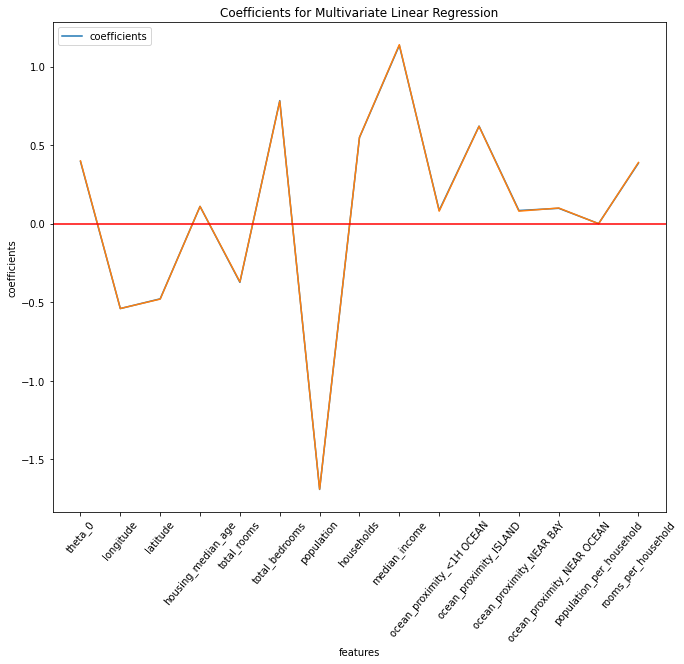

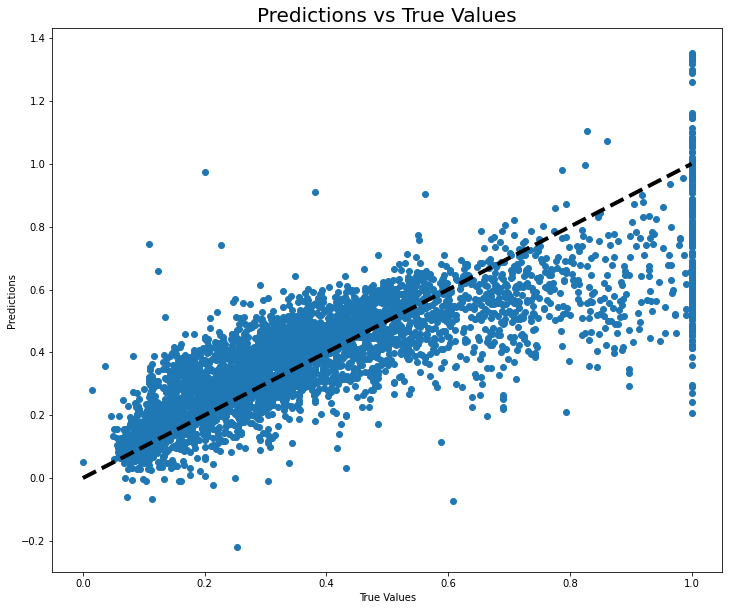

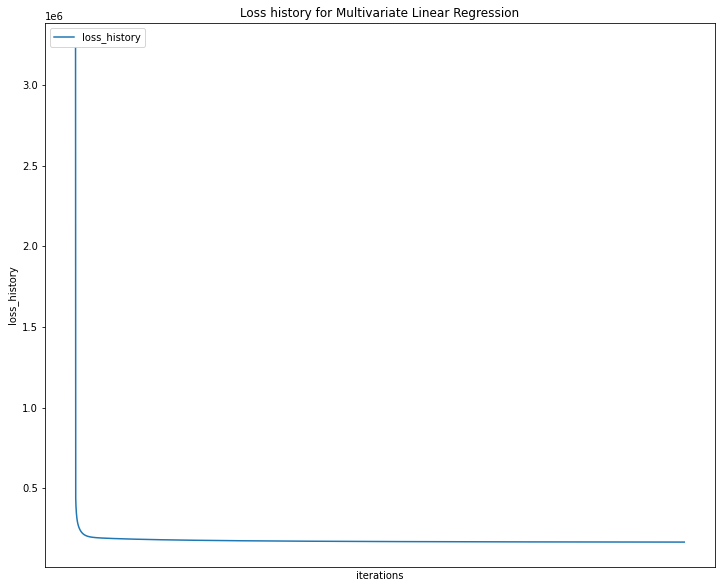

In [89]:
dataset = dataset_for_part_h
dataset.insert(0, "theta_0", np.ones(dataset.shape[0]))
feature_columns = dataset.drop('median_house_value', axis=1).columns

# print(">=========== split data to 60% train,20% validation and 20% test ===========<")
x_train, y_train, x_validation_test, y_validation_test = train_test_split(copy_df(dataset), train_size=.6, shuffle=True)
x_validation, y_validation, x_test, y_test = train_test_split(concat_data(x_validation_test, y_validation_test), test_size=.5, shuffle=True)

# convert all data to np array
x_train, y_train, x_validation, y_validation, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation), np.array(x_test), np.array(y_test)

# add a column with all values 1 to the first column of x_train
# x_train = np.insert(x_train, 0, 1, axis=1) 
# print(">===========================================================================<")

# initialize theta with random values between 0 and 1
theta = np.random.rand(x_train.shape[1])
print("Intial theta shape: ", theta.shape[0], "\n", "Intial theta: ", theta)
print_hypothesis(x_train, theta)
y_train = y_train.reshape(y_train.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
y_validation = y_validation.reshape(y_validation.shape[0],)

theta, history_theta, loss_histoy = gradient_descent(x_train, y_train, x_validation, y_validation, theta, 0.5, .7, 10000)

y_predict = hypothesis(x_test, theta)
y_test = np.array(y_test).reshape(y_test.shape[0],)

report_error = pd.DataFrame({"mse": [calculate_mse(y_predict, y_test)], "rmse": [calculate_rmse(y_predict, y_test)], "mae": [
                            calculate_mae(y_predict, y_test)], "mape": [calculate_mape(y_predict, y_test)], "r_squared": [calculate_r_squared(y_predict, y_test)]})
print("Error on test set: \n", report_error)

coeffs = pd.DataFrame({"theta": history_theta[-1], "coeff": history_theta[-1]})
coeffs["coeff"] = coeffs["coeff"].apply(lambda x: np.round(x, 2))

# print(">===================== Figures =====================<")
# default plot
plt.figure(figsize=(11, 9))
plt.plot(range(len(coeffs)), coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)), feature_columns, rotation=50)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title("Coefficients for Multivariate Linear Regression")
plt.legend(["coefficients"], loc="upper left")
plt.show()

plt.figure(figsize=(12, 10))
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values', fontsize=20)
plt.show()

plt.figure(figsize=(12, 10))
plt.plot(range(len(loss_histoy)), loss_histoy)
# plt.axhline(0, color='r', linestyle='solid')
plt.xticks([])
# plt.xticks(range(len(loss_histoy)), range(len(loss_histoy)), rotation=50)
plt.xlabel("iterations")
plt.ylabel("loss_history")
plt.title("Loss history for Multivariate Linear Regression")
plt.legend(["loss_history"], loc="upper left")
plt.show()
# print(">===================================================<")

# Explanatory Data Analysis (EDA)

In [1]:
df = copy_df(dataset)

# Housing distribution on the map
plt.figure(figsize=(16,6))
fig = sns.scatterplot(df.longitude, df.latitude, hue=df['median_house_value'],
                      legend=False, palette='winter')

NameError: name 'copy_df' is not defined

## Correlation matrix

In [54]:
df.corr().style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,0.321121,0.009446,-0.474489,0.045509,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.446969,-0.016572,0.358771,-0.160818,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.045300,0.017020,0.255172,0.021622,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,-0.003031,-0.007572,-0.023022,-0.009175,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.018220,-0.004361,-0.019785,0.000676,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,0.074613,-0.010412,-0.060880,-0.024264,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.042435,-0.009077,-0.010093,0.001714,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.168876,-0.009228,0.056197,0.027344,0.688075
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018220,0.074613,0.042435,0.168876,1.000000,-0.013872,-0.314813,-0.342620,0.256617
ocean_proximity_ISLAND,0.009446,-0.016572,0.017020,-0.007572,-0.004361,-0.010412,-0.009077,-0.009228,-0.013872,1.000000,-0.005499,-0.005985,0.023416


<AxesSubplot:title={'center':'Correlation Matrix'}, xlabel='Features'>

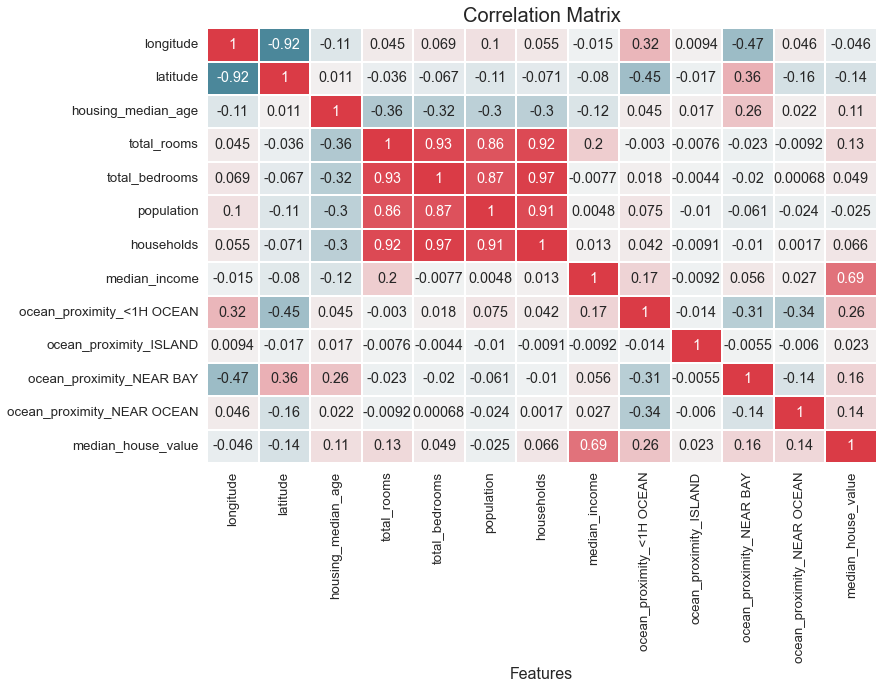

In [55]:
def correlation_heatmap(data):
    """arguments: data_frame:pandas DataFrame
       returns: correlation heatmap"""
    
    #  setting the context
    sns.set(context='paper', style='white', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True)
    
    #  making correlation object and saving it into variable
    correlation = data.corr()
    
    #  creating heatmap figure object (paper) and ax object (the plot)
    fig, ax = plt.subplots(figsize=(12, 8))
    
    #  generating color palettes
    cmap = sns.diverging_palette(220, 10, center='light', as_cmap=True)
    
    #  draw the heatmap
    heatmap = sns.heatmap(correlation, vmax=1,vmin=-1,center=0, square=False, annot=True, cmap=cmap,
                         lw=2, cbar=False)
    
    # using fig and ax variables to set the title and labels
    heatmap.set_title('Correlation Matrix', fontsize=20)
    heatmap.set_xlabel('Features', fontsize=16)
    
    return heatmap

correlation_heatmap(df)

In [277]:
import os
import math
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

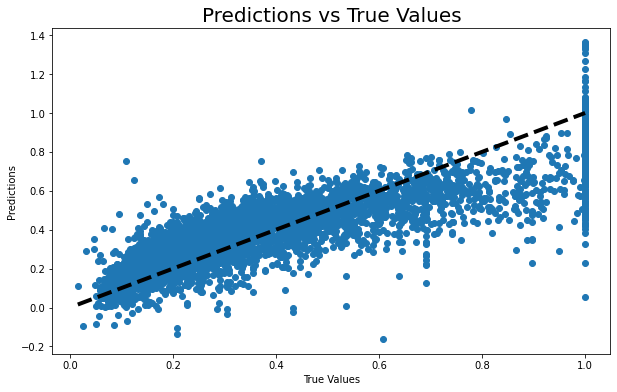

-0.02019783559016023
[0.42035925]
[ 0.         -0.56067197 -0.50103457  0.11987777 -0.32457138  0.85671214
 -2.74443547  0.97305853  1.15349471  0.07535157  0.52593851  0.07254744
  0.09313696]


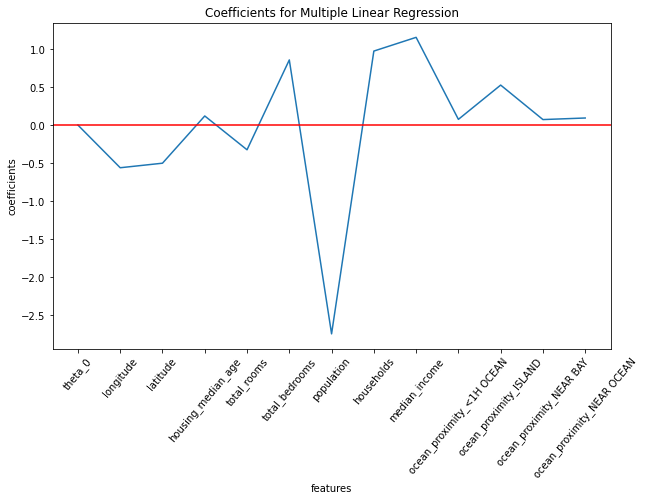

mse: [-0.01996657 -0.02264864 -0.02060919 -0.02194896 -0.01869898 -0.01931304
 -0.02040553 -0.02078052 -0.02039781 -0.0172091 ]


In [338]:
dataset = load("housing.csv")
dataset = normalize_missing_values(dataset)
last_column = dataset[["median_house_value"]]
dataset = remove_column(dataset, "median_house_value")

dataset = dummy_variable_indicator(dataset, "ocean_proximity")
dataset = remove_column(dataset, "ocean_proximity_INLAND")
dataset = concat_data(dataset, last_column)

dataset = normalize_numerical_columns(dataset)

dataset.insert(0, "theta_0", np.ones(dataset.shape[0]))

X = dataset.drop('median_house_value', axis=1)
y = dataset[['median_house_value']]

feature_columns = list(X.columns)

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size=.4)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5)

regressor = LinearRegression(fit_intercept=True)
model = regressor.fit(x_train, y_train)
y_predict = model.predict(x_test)

# plt.figure(figsize=(10,6))
# plt.scatter(y_test, y_predict)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.show()

y_predict = pd.DataFrame(y_predict, columns=["median_house_value"])
y_predict = y_predict.reset_index(drop=True)

# draw hyperplane for multivariate linear regression with y_predict and y_test
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values', fontsize=20)
plt.show()

mse = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(mse.mean())

multiple_lr_coeffs = model.coef_[0]
print(model.intercept_)
print(multiple_lr_coeffs)

plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_lr_coeffs)),multiple_lr_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)),feature_columns,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

print("mse:", mse)

In [28]:
x_train.corr().style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.923981,-0.105167,0.040254,0.067978,0.099033,0.054140,-0.018263,0.318957,0.009828,-0.471625,0.039843
latitude,-0.923981,1.000000,0.008003,-0.032579,-0.065859,-0.108276,-0.069372,-0.077705,-0.448669,-0.016882,0.355986,-0.153636
housing_median_age,-0.105167,0.008003,1.000000,-0.360765,-0.318483,-0.293700,-0.300811,-0.117351,0.038559,0.018719,0.257925,0.030750
total_rooms,0.040254,-0.032579,-0.360765,1.000000,0.928249,0.856030,0.920379,0.198950,0.000073,-0.004257,-0.024612,-0.019292
total_bedrooms,0.067978,-0.065859,-0.318483,0.928249,1.000000,0.878468,0.982014,-0.011577,0.022405,0.000087,-0.021619,-0.010365
population,0.099033,-0.108276,-0.293700,0.856030,0.878468,1.000000,0.905168,0.002187,0.076275,-0.007894,-0.063179,-0.033262
households,0.054140,-0.069372,-0.300811,0.920379,0.982014,0.905168,1.000000,0.010285,0.043745,-0.006190,-0.012982,-0.008581
median_income,-0.018263,-0.077705,-0.117351,0.198950,-0.011577,0.002187,0.010285,1.000000,0.174705,-0.008851,0.053144,0.025225
ocean_proximity_<1H OCEAN,0.318957,-0.448669,0.038559,0.000073,0.022405,0.076275,0.043745,0.174705,1.000000,-0.013937,-0.317702,-0.335765
ocean_proximity_ISLAND,0.009828,-0.016882,0.018719,-0.004257,0.000087,-0.007894,-0.006190,-0.008851,-0.013937,1.000000,-0.005524,-0.005838


In [44]:
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.07, 0.075, 0.08, 0.09,0.1,0.2,0.3,0.31,0.32,0.33,0.34, 0.35, 0.351, 0.352, 0.0353, 0.0354, 0.355 , 0.356 ,0.357, 0.358, 0.359 ,0.36, 0.37,0.38, 0.39, 0.4, 0.45, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
ridge.fit(x_train, y_train)
print(ridge.best_params_)

{'alpha': 0.3}


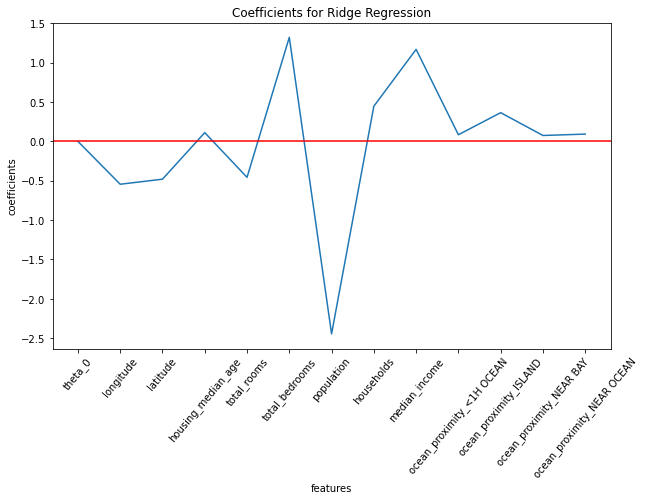

In [45]:
best_ridge_model= Ridge(alpha=ridge.best_params_['alpha'])
best_ridge_coeffs = best_ridge_model.fit(x_train, y_train).coef_
# print(best_ridge_coeffs)
#plot 
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_columns)),best_ridge_coeffs[0])
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)),feature_columns,rotation=50)
plt.title("Coefficients for Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
lasso = GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
lasso_fit = lasso.fit(x_train, y_train)
print(lasso_fit.best_params_)
print(lasso_fit.best_score_)

{'alpha': 0.001}
-0.02262223714466208


[ 0.         -0.01894358 -0.          0.08820824  0.          0.08105182
 -0.          0.          1.08835328  0.14311988  0.          0.15631366
  0.16910718]


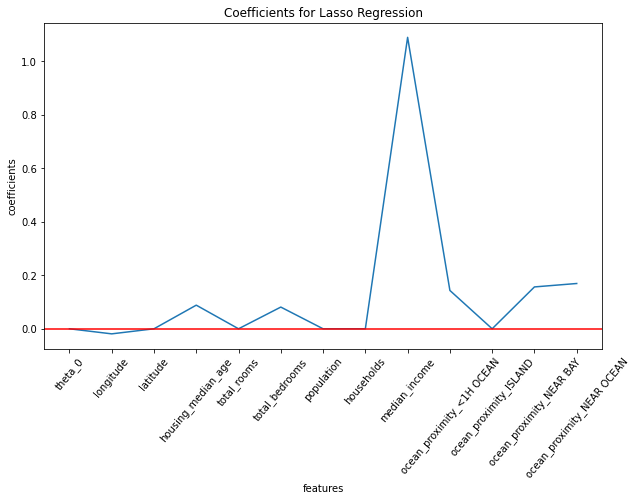

In [47]:
best_lasso_model= Lasso(alpha=lasso_fit.best_params_['alpha'])
best_lasso_coeffs = best_lasso_model.fit(x_train, y_train).coef_

print(best_lasso_coeffs)

# plot
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_columns)),best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)),feature_columns,rotation=50)
plt.title("Coefficients for Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()


In [50]:
alpha_values = {'alpha':[0.01, 0.05, 0.06, 0.08, 1], 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic = GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
elastic_fit = elastic.fit(x_train, y_train)
print(elastic_fit.best_params_)
print(elastic_fit.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.1}
-0.025939313186586637


In [51]:
best_elastic_coeefs = elastic_fit.best_estimator_.coef_


In [52]:
# compare models with different regularization parameters
comparing_models = [('Linear Regression', LinearRegression()), ('Ridge Regression', Ridge()), ('Lasso Regression', Lasso()), ('Elastic Net', ElasticNet())]

comparing_models = pd.DataFrame({'without_regularization':multiple_lr_coeffs,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs,
  'Elastic Net':best_elastic_coeefs}, index=feature_columns)
# Highlighting coefficient estimates with value '0'
comparing_models.style.background_gradient(cmap='coolwarm')

comparing_models

,without_regularization,Ridge,Lasso,Elastic Net
theta_0,0.000000,0.000000,0.000000,0.000000
longitude,-0.559328,-0.544001,-0.018944,-0.046550
latitude,-0.494833,-0.479799,-0.000000,-0.022790
housing_median_age,0.111586,0.111736,0.088208,0.046589
total_rooms,-0.520944,-0.456392,0.000000,0.010282
total_bedrooms,1.467754,1.322090,0.081052,0.003804
population,-2.780260,-2.444812,-0.000000,-0.000000
households,0.505994,0.447080,0.000000,0.000000
median_income,1.177032,1.169511,1.088353,0.697426
ocean_proximity_<1H OCEAN,0.082409,0.084638,0.143120,0.155535


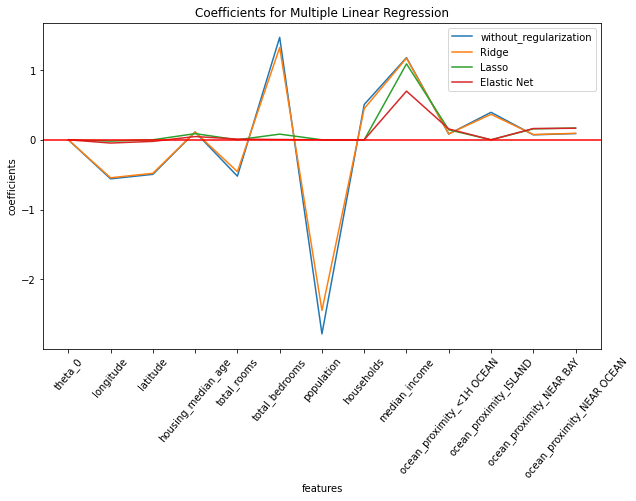

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_columns)),comparing_models['without_regularization'], label='without_regularization')
plt.plot(range(len(feature_columns)),comparing_models['Ridge'], label='Ridge')
plt.plot(range(len(feature_columns)),comparing_models['Lasso'], label='Lasso')
plt.plot(range(len(feature_columns)),comparing_models['Elastic Net'], label='Elastic Net')
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)),feature_columns,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.legend()
plt.show()

In [54]:
# solve same problem with neural network
from sklearn.neural_network import MLPRegressor
dataset = load("housing.csv")
dataset = normalize_missing_values(dataset)
last_column = dataset[["median_house_value"]]
dataset = remove_column(dataset, "median_house_value")
dataset = dummy_variable_indicator(dataset, "ocean_proximity")
dataset = remove_column(dataset, "ocean_proximity_INLAND")
dataset = concat_data(dataset, last_column)

# dataset = normalize_numerical_columns(dataset)

X = dataset.drop('median_house_value', axis=1)
y = dataset[['median_house_value']]

feature_columns = list(X.columns)

# split dataset into train, validation and test - 80% train, 10% validation and 10% test with sklearn

SEED = 42
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(
    X, y, test_size=.4, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(
    x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# fit the model with regularization
mlp.fit(x_train, y_train)
mlp.score(x_train, y_train)
mlp.score(x_validation, y_validation)
mlp.score(x_test, y_test)

print(mlp.coefs_)
print(mlp.intercepts_)

# predict the test set
y_pred = mlp.predict(x_test)


# MSE, MAE, R2
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))


[array([[-5.11102128e+000, -1.71822580e-254,  5.86142466e+000, ...,
        -5.39055068e+000, -5.01227186e+000, -5.22631462e+000],
       [ 4.05562547e+000, -3.49130830e-273, -4.49842810e+000, ...,
         3.93978498e+000,  4.35000674e+000,  4.23356753e+000],
       [ 6.42211023e+000, -4.52870805e-271, -7.39314647e+000, ...,
         6.68503340e+000,  6.47193697e+000,  6.53935933e+000],
       ...,
       [ 2.46704285e+000, -3.21640961e-261, -3.01627989e+000, ...,
         2.83813121e+000,  2.48706103e+000,  2.69973345e+000],
       [ 1.02965408e+001, -9.58854489e-255, -1.07375632e+001, ...,
         1.02996773e+001,  1.03020071e+001,  1.03424014e+001],
       [ 1.12568901e+001,  1.39841264e-253, -1.21066046e+001, ...,
         1.14618329e+001,  1.15424476e+001,  1.15510239e+001]]), array([[ 2.62653788e+000],
       [ 1.39076287e-278],
       [-3.48625538e+000],
       [ 2.41821780e+000],
       [ 2.47798243e+000],
       [ 1.98815050e+000],
       [ 2.11189142e+000],
       [ 5.55409

In [57]:
# X = dataset[['column_1', 'column_2', 'column_3', 'column_4']].values
# y = dataset['label'].values.reshape(-1, 1)


In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

classes:  [0 1] coef:  [[-3.06415839 -1.75008125 -2.1082241  -0.15533781]] intercept:  [3.21217099]
1.0


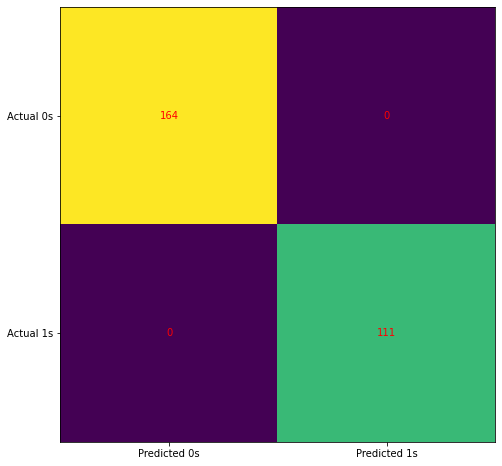

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       111

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [74]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X, y)
print("classes: ",model.classes_, "coef: ", model.coef_, "intercept: ", model.intercept_)
model.predict_proba(x_test)
y_predict = model.predict(x_test)
print(model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(y_test, model.predict(x_test)))


In [34]:
# logistic regression untility function
def logistic(z):
    return 1 / (1 + np.exp(-z))


[[  1.        3.6216    8.6661   -2.8073   -0.44699]
 [  1.        4.5459    8.1674   -2.4586   -1.4621 ]
 [  1.        3.866    -2.6383    1.9242    0.10645]
 ...
 [  1.       -3.7503  -13.4586   17.5932   -2.7771 ]
 [  1.       -3.5637   -8.3827   12.393    -1.2823 ]
 [  1.       -2.5419   -0.65804   2.6842    1.1952 ]]


In [35]:
alpha = 0.5
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon

oldJ = 0
err = 1

Js = []
count = 0

while err > 1e-3:
    Zs = np.dot(X, weights)
    Hs = logistic(Zs) # phi
    
    deltas = alpha/M*np.dot(X.T, (Hs-y))
    weights -= deltas

    count += 1

    # Cross Entropy
    J = -1/M*(np.dot(y.T, np.log(Hs)) + np.dot(1-y.T, np.log(1-Hs)))
    
    Js.append(float(J))
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 10 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

10 [[0.12547923]] [[0.00454762]] [ 0.34990808 -1.07691658 -0.53655805 -0.54498501 -0.23275809]
20 [[0.09725384]] [[0.00199153]] [ 0.59085059 -1.25321745 -0.6668041  -0.6996085  -0.26557674]
30 [[0.0822278]] [[0.00120257]] [ 0.7861224  -1.37270143 -0.7548469  -0.80807973 -0.27413342]
35 [[0.07689934]] [[0.00098395]] [ 0.87154032 -1.42137343 -0.79050236 -0.85264076 -0.27451604]


In [36]:
def plot_boundary(Zs, Hs, y):
    data_fit = np.concatenate((Zs, Hs), axis=1)
    data_fit.sort(axis = 0)

    z = np.linspace(Zs.min(), Zs.max(), 100)

    plt.plot(z, logistic(z), 'r', label='Theory')
    plt.plot(Zs, Hs, 'o', label='empirical', markersize=8)
    plt.plot(Zs, y, 'r_', label = 'data', markersize=8)
    plt.xlabel('z')
    plt.ylabel('h(z)')
    #plt.title('Logistic Regression')
    plt.legend()

plot_boundary(Zs, Hs, y)


NameError: name 'Zs' is not defined

In [259]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()


In [261]:
cv_results = cross_validate(lasso, X, y, cv=3)
sorted(cv_results.keys())

cv_results['test_score']

scores = cross_validate(lasso, X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])

print(scores['train_r2'])


[-3635.51152303 -3573.34242148 -6114.78229547]
[0.28010158 0.39088426 0.22784852]


# Q2: Logistic Regression

In [5]:
def logistic(x_data, theta):
    return 1 / (1 + np.exp(-np.dot(x_data, theta)))

def hypothesis(x_data, weights):
    return logistic(x_data, weights)

def logistic_regression_regularized_loss(x_data, theta, lambda_):
    m_number_of_samples = len(x_data)
    j_theta_2 = lambda_/(2*m_number_of_samples) * np.sum(theta**2)
    return j_theta_2

def logistic_regression_loss(x_data, y_data, theta):
    m_number_of_samples = len(x_data)
    j_theta_1 = -1/m_number_of_samples * np.sum(y_data * np.log(logistic(x_data, theta)) + (1 - y_data) * np.log(1 - logistic(x_data, theta)))
    return j_theta_1

def loss_function(x_data, y_data, theta):
    """Loss Function without regularization
    @param x_data: train data
    @param y_data: train label
    @param theta: weights
    @return: loss function value
    """
    m_number_of_samples = x_data.shape[0]
    j_theta_1_mse_loss = np.sum(np.square(hypothesis(x_data, theta) - y_data)) / 2 * m_number_of_samples
    return j_theta_1_mse_loss

def gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter, alpha, max_iteration):
    """gradient_descent
    @param x_train: train data
    @param y_train: train label
    @param x_validation: validation data
    @param y_validation: validation label
    @param theta: wieghts
    @param regularization_paramet: lambda regularization parameter
    @param alpha: learning rate
    @param max_iteration: epochs
    @return: updated wieghts and loss function value
    """
    m_number_of_samples = x_train.shape[0]
    theta_dict = {}
    evaluation_with_validation_set_list = []

    with tqdm (total=max_iteration) as progress_bar:
        for iteration in range(max_iteration):
            hypothesis_value = hypothesis(x_train, theta)

            # updating θ_j with regularization
            for j_index in range(theta.shape[0]):
                if j_index != 0:
                    theta[j_index] -= alpha *  (1 / m_number_of_samples) * (np.dot(hypothesis_value - y_train, x_train[:, j_index]) + regularization_parameter * theta[j_index])
                else:
                    theta[j_index] -= alpha *  (1 / m_number_of_samples) * np.dot(hypothesis_value - y_train, x_train[:, j_index])

            evaluation_with_validation_set_list.append(loss_function(x_validation, y_validation, theta))
            theta_dict[iteration] = theta

            if len(evaluation_with_validation_set_list) >= 8:
                treshold_list = np.array(evaluation_with_validation_set_list[-8:])
                if treshold_list[-1 and -2 and -3 and -4 and -5 and -6 and -7] > treshold_list[-8]:

                    # if alpha > 1e-3:
                        # feedback = f"learning rate is too high, reducing it from {alpha}"
                        # alpha /= 2
                        # feedback += f" to {alpha} in iteration {iteration}"
                        # print(feedback)
                        # continue

                    print("iteration: ", iteration, "regularization_parameter: ", regularization_parameter, "alpha: ", alpha,  "loss: ", evaluation_with_validation_set_list[-1])
                    return theta, theta_dict, evaluation_with_validation_set_list

            if len(evaluation_with_validation_set_list) >= 10:
                plateau_list = np.array(evaluation_with_validation_set_list[-10:])
                if np.all(plateau_list == plateau_list[0]):
                    print("plateau: ", plateau_list)

                    print("iteration: ", iteration, "regularization_parameter: ", regularization_parameter, "alpha: ", alpha,  "loss: ", evaluation_with_validation_set_list[-1])
                    return theta, theta_dict, evaluation_with_validation_set_list

            progress_bar.update(1)
        print("regularization_parameter: ", regularization_parameter, "alpha: ", alpha,  "loss: ", evaluation_with_validation_set_list[-1])
    return theta, theta_dict, evaluation_with_validation_set_list




In [6]:
# print(">======================= Loading ====================<")
dataset = load("data_banknote_authentication.txt", False)
# print(">=====================================================")

# print(">============ Data without missing values ===========<")
dataset = normalize_missing_values(dataset)
dataset.rename(columns={0: 'column_1', 1: 'column_2', 2: 'column_3', 3: 'column_4', 4:'label' }, inplace=True)
# print_dataset(dataset)
# dataset.tail()
# print(">=====================================================")

# print(">============= Normalize numerical columns ==========<")
label_column = dataset[["label"]]
# dataset = remove_column(dataset, "label")
# dataset = normalize_numerical_columns(dataset)
# dataset = concat_data(dataset, label_column)
dataset.insert(0, "theta_0", np.ones(dataset.shape[0]))
feature_columns = dataset.drop('label', axis=1).columns
# print(">====================================================<")

# print(">=========== split data to 60% train,20% validation and 20% test ===========<")
x_train, y_train, x_validation_test, y_validation_test = train_test_split(copy_df(dataset), train_size=.6, shuffle=True)
x_validation, y_validation, x_test, y_test = train_test_split(concat_data(x_validation_test, y_validation_test), test_size=.5, shuffle=True)

# print(feature_columns, x_train.head())

x_train, y_train, x_validation, y_validation, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation), np.array(x_test), np.array(y_test)
y_train, y_test, y_validation, = reshape_to_1d(y_train, y_test, y_validation)
# print(">====================================================<")

In [7]:
print(len(x_train), len(y_train), len(x_validation), len(y_validation), len(x_test), len(y_test))
print(x_train)
print(x_validation)
print(x_test)
print(y_train)

823 823 274 274 275 275
[[ 1.       0.3223  -0.89808  8.0883   0.69222]
 [ 1.       1.2309   3.8923  -4.8277  -4.0069 ]
 [ 1.      -2.7769  -5.6967   5.9179   0.37671]
 ...
 [ 1.      -0.63298 -5.1277   4.5624   1.4797 ]
 [ 1.      -4.2932   3.3419   0.77258 -0.99785]
 [ 1.       3.2303   7.8384  -3.5348  -1.2151 ]]
[[ 1.00000e+00  2.56780e+00  3.51360e+00  6.14060e-01 -4.06910e-01]
 [ 1.00000e+00  4.93420e+00  2.41070e+00 -1.75940e-01  1.62450e+00]
 [ 1.00000e+00 -9.21940e-02  3.93150e-01 -3.28460e-01 -1.37940e-01]
 ...
 [ 1.00000e+00  4.43380e+00  9.88700e+00 -4.67950e+00 -3.74830e+00]
 [ 1.00000e+00  2.03100e+00  1.85200e+00 -3.01210e+00  3.00300e-03]
 [ 1.00000e+00 -1.84110e+00  1.08306e+01  2.76900e+00 -3.09010e+00]]
[[ 1.       -3.1273   -7.1121   11.3897   -0.083634]
 [ 1.        3.9771   11.1513   -3.9272   -4.3444  ]
 [ 1.        5.0452    3.8964   -1.4304    0.86291 ]
 ...
 [ 1.        2.6799    3.1349    0.34073   0.58489 ]
 [ 1.        2.2091    7.4556   -1.3284   -3.3021  

In [8]:
# print(">=================== Initialize theta with random values ===================<")
theta = np.random.rand(x_train.shape[1]) # random values between 0 and 1 
# theta = np.random.rand(x_train.shape[1]) * 5 + 5 # random values between 5 and 10
# theta = np.random.rand(x_train.shape[1]) * 1 + 2 # random values between 2 and 3

# regularization parameter lambda
regul_param_list = [0, 0.01, 0.1, 1, 10]
alpha_list = [.1, .3, .5, .7, .9, 1]
max_iteration = 10000
# print(">====================================================<")

def report_gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter_list, alpha_list, max_iteration):
    theta_list = []
    loss_list = []
    # report_dict_gradient_decent = pd.DataFrame(columns=["regularization_parameter", "alpha", "loss"])
    counter = 0 
    report_dict_gradient_decent = {}
    theta_value = np.random.rand(x_train.shape[1]) 
    for regularization_parameter in regularization_parameter_list:
        for alpha in alpha_list:
            theta = theta_value
            theta_, _, loss_histoy = gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter=regularization_parameter, alpha=alpha, max_iteration=max_iteration)
            loss_list.append(loss_histoy)
            theta_list.append({counter: [*theta_]})
            print("Coefficients: ", theta_list[counter])
            # report_dict_gradient_decent.loc[len(report_dict_gradient_decent)] = [regularization_parameter, alpha]
            
            print(">====================================================<")
            report_dict_gradient_decent[counter] = {
                "regularization_parameter": regularization_parameter,
                "alpha": alpha,
                "loss": loss_histoy
            }
            print(report_dict_gradient_decent[counter])
            print(">====================================================<")
            
            counter += 1

    return report_dict_gradient_decent, theta_list, loss_list

report_dict, theta_list, loss_list = report_gradient_descent(x_train, y_train, x_validation, y_validation, theta, regul_param_list, alpha_list, max_iteration)

  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0 alpha:  0.1 loss:  247.89857251754657
Coefficients:  {0: [4.097893863847168, -3.9669359627767986, -2.295432033915437, -2.7936204744941877, -0.33177903431037853]}
>====================================================<
{'regularization_parameter': 0, 'alpha': 0.1, 'loss': [20637.096231901047, 17712.013721502262, 15232.958126691057, 13073.58704307946, 11167.081057331417, 9501.877951357632, 8084.673883045806, 6917.570197876492, 5981.792668926411, 5241.657979127822, 4657.826030299065, 4194.825371140551, 3823.424246976137, 3520.8656652456184, 3270.137669571227, 3058.829100991336, 2877.966526842879, 2721.043054486723, 2583.289693054389, 2461.1587192237566, 2351.9665836320255, 2253.648682689048, 2164.59015173771, 2083.507844726042, 2009.3668950690871, 1941.3208818010005, 1878.668330548364, 1820.820685436418, 1767.2784522130728, 1717.6132387690513, 1671.4541014605381, 1628.4770667618013, 1588.3970147870912, 1550.961332786225, 1515.9449039422718, 1483.1461098643247, 

  0%|          | 0/10000 [00:00<?, ?it/s]

regularization_parameter:  0 alpha:  0.3 loss:  226.53219081753525
Coefficients:  {1: [5.561196570815781, -5.783335700812856, -3.2316665342000688, -4.020181316525126, -0.5669684946352547]}
>====================================================<
{'regularization_parameter': 0, 'alpha': 0.3, 'loss': [247.89126438375683, 247.8839595477832, 247.8766580083689, 247.86935976403, 247.86206481310882, 247.8547731538123, 247.8474847842447, 247.84019970243023, 247.83291790633237, 247.82563939386782, 247.81836416291833, 247.81109221133826, 247.80382353696194, 247.79655813760888, 247.78929601108752, 247.78203715519808, 247.77478156773537, 247.7675292464905, 247.7602801892521, 247.75303439380755, 247.74579185794425, 247.73855257944945, 247.7313165561111, 247.72408378571845, 247.71685426606237, 247.70962799493543, 247.7024049701318, 247.69518518944795, 247.68796865068188, 247.68075535163476, 247.67354529010862, 247.66633846390897, 247.65913487084296, 247.65193450872025, 247.64473737535312, 247.63754346

  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7883 regularization_parameter:  0 alpha:  0.5 loss:  224.4271812853727
Coefficients:  {2: [6.442048938635277, -6.850090218394069, -3.7846005863200936, -4.743404902652074, -0.7042900058031081]}
>====================================================<
{'regularization_parameter': 0, 'alpha': 0.5, 'loss': [226.53136317231818, 226.5305358117467, 226.52970873555864, 226.52888194354315, 226.52805543552577, 226.527229211355, 226.52640327089634, 226.52557761402616, 226.5247522406272, 226.52392715058934, 226.52310234380346, 226.52227782016482, 226.52145357956806, 226.5206296219111, 226.51980594709045, 226.51898255500512, 226.5181594455534, 226.51733661863352, 226.51651407414494, 226.51569181198602, 226.5148698320561, 226.51404813425472, 226.5132267184804, 226.51240558463292, 226.51158473261106, 226.51076416231484, 226.50994387364344, 226.50912386649608, 226.50830414077217, 226.507484696372, 226.50666553319417, 226.50584665113817, 226.50502805010487, 226.50420972999254, 226.50339169070

  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0 alpha:  0.7 loss:  224.42718530199457
Coefficients:  {3: [6.442977735183929, -6.851203666830962, -3.7851794125461007, -4.744161198805212, -0.7044312399919467]}
>====================================================<
{'regularization_parameter': 0, 'alpha': 0.7, 'loss': [224.42718158662453, 224.4271819454272, 224.42718236165234, 224.4271828352181, 224.42718336607032, 224.42718395416983, 224.42718459948645, 224.42718530199457]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0 alpha:  0.9 loss:  224.4271958664735
Coefficients:  {4: [6.4441709649524075, -6.852634087897242, -3.7859230218465774, -4.745132798678479, -0.7046126736556009]}
>====================================================<
{'regularization_parameter': 0, 'alpha': 0.9, 'loss': [224.42718629190267, 224.42718737661372, 224.42718855585417, 224.42718982948094, 224.4271911974101, 224.42719265958291, 224.4271942159514, 224.4271958664735]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0 alpha:  1 loss:  224.4272146830075
Coefficients:  {5: [6.445495529600036, -6.8542219082436455, -3.7867484621336622, -4.746211315790621, -0.7048140629880757]}
>====================================================<
{'regularization_parameter': 0, 'alpha': 1, 'loss': [224.42719781226205, 224.42719987439693, 224.42720205266673, 224.42720434695903, 224.4272067571977, 224.42720928332213, 224.42721192527668, 224.4272146830075]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.01 alpha:  0.1 loss:  224.42921280170958
Coefficients:  {6: [6.445627793831123, -6.854313936019774, -3.786794096803554, -4.746273224843612, -0.7048271522750134]}
>====================================================<
{'regularization_parameter': 0.01, 'alpha': 0.1, 'loss': [224.42748538057074, 224.42774955619933, 224.42800750118977, 224.42825948943394, 224.42850577848648, 224.42874661057476, 224.42898221353727, 224.42921280170958]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.01 alpha:  0.3 loss:  224.43368512625534
Coefficients:  {7: [6.446023143067928, -6.854589778928309, -3.7869310605344624, -4.7464612189971715, -0.7048641456931655]}
>====================================================<
{'regularization_parameter': 0.01, 'alpha': 0.3, 'loss': [224.42989015075955, 224.43052588954797, 224.43112484006554, 224.43169097574176, 224.43222757778375, 224.43273736260457, 224.43322258568972, 224.43368512625534]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.01 alpha:  0.5 loss:  224.43824940478967
Coefficients:  {8: [6.446677475139904, -6.855049571305944, -3.7871618966444607, -4.746778616748157, -0.7049187928810664]}
>====================================================<
{'regularization_parameter': 0.01, 'alpha': 0.5, 'loss': [224.4344208784037, 224.43510165731277, 224.43573262844205, 224.4363176628971, 224.43685972925888, 224.4373611647934, 224.43782386322522, 224.43824940478967]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.01 alpha:  0.7 loss:  224.44086303689411
Coefficients:  {9: [6.447584684805364, -6.855694465999102, -3.787491157679757, -4.747228026272513, -0.7049828362238733]}
>====================================================<
{'regularization_parameter': 0.01, 'alpha': 0.7, 'loss': [224.4387950796796, 224.439272927285, 224.43968590706876, 224.44003664312547, 224.44032753706995, 224.44056083327246, 224.44073865696512, 224.44086303689411]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.01 alpha:  0.9 loss:  224.439519033812
Coefficients:  {10: [6.44873740278272, -6.856526731024124, -3.7879225081283314, -4.747812071688465, -0.705048382820372]}
>====================================================<
{'regularization_parameter': 0.01, 'alpha': 0.9, 'loss': [224.44095677403485, 224.4409684741337, 224.44090197201373, 224.4407609284995, 224.44054884165183, 224.44026905543654, 224.4399247670992, 224.439519033812]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  1429 regularization_parameter:  0.01 alpha:  1 loss:  223.86031843594154
Coefficients:  {11: [6.6110654656502215, -7.031011985875458, -3.8773237409695036, -4.865844558166558, -0.7214788486307205]}
>====================================================<
{'regularization_parameter': 0.01, 'alpha': 1, 'loss': [224.43900320633824, 224.43841857992345, 224.43776882084987, 224.43705741688154, 224.43628768577707, 224.43546278344303, 224.43458571171135, 224.43365932575554, 224.43268634115412, 224.43166934062276, 224.43061078042095, 224.429512996459, 224.42837821011082, 224.42720853374783, 224.42600597601069, 224.42477244682797, 224.42350976219248, 224.42221964871158, 224.42090374793798, 224.41956362048984, 224.4182007499774, 224.41681654673656, 224.41541235138683, 224.4139894382134, 224.41254901838963, 224.41109224304222, 224.40962020617087, 224.4081339474223, 224.40663445473695, 224.40512266686054, 224.40359947574035, 224.40206572880177, 224.40052223111635, 224.39896974746438, 224.3

  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  0.1 loss:  223.87878674960984
Coefficients:  {12: [6.611141562680272, -7.030487742388941, -3.877031382464291, -4.865483193545071, -0.7214252275606118]}
>====================================================<
{'regularization_parameter': 0.1, 'alpha': 0.1, 'loss': [223.86281932128534, 223.86526026664842, 223.86764395429785, 223.86997290666847, 223.87224949615282, 223.87447595428858, 223.8766543803831, 223.87878674960984]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  0.3 loss:  223.9202356398232
Coefficients:  {13: [6.611357362053012, -7.028913800289027, -3.8761550991461196, -4.86442094669326, -0.7212436921779025]}
>====================================================<
{'regularization_parameter': 0.1, 'alpha': 0.3, 'loss': [223.885053129237, 223.89093746659066, 223.8964841919984, 223.90172993282877, 223.90670494457774, 223.91143427858552, 223.9159387348962, 223.9202356398232]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  0.5 loss:  223.9628986399574
Coefficients:  {14: [6.611677563651804, -7.026294609546077, -3.874719728637567, -4.862690766529077, -0.7208774717935666]}
>====================================================<
{'regularization_parameter': 0.1, 'alpha': 0.5, 'loss': [223.92707818169006, 223.9334180872406, 223.93930286880237, 223.94476806368704, 223.94984084883575, 223.95454254880053, 223.95889037621833, 223.9628986399574]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  0.7 loss:  223.98809373606554
Coefficients:  {15: [6.61205001342451, -7.022646257984888, -3.872770268398602, -4.860320230836195, -0.7202516177924895]}
>====================================================<
{'regularization_parameter': 0.1, 'alpha': 0.7, 'loss': [223.96805500248502, 223.97259069099778, 223.97653227914458, 223.97990330005365, 223.98272529553708, 223.98501842196464, 223.98680180276446, 223.98809373606554]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  0.1 alpha:  0.9 loss:  223.97723347434237
Coefficients:  {16: [6.612412372707444, -7.017997282417572, -3.8703448353894316, -4.857338769445188, -0.7192946939448868]}
>====================================================<
{'regularization_parameter': 0.1, 'alpha': 0.9, 'loss': [223.9891484360686, 223.98944770962862, 223.98902640915458, 223.98791793693354, 223.98615432072688, 223.98376627361148, 223.98078324612894, 223.97723347434237]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  738 regularization_parameter:  0.1 alpha:  1 loss:  220.30783680559387
Coefficients:  {17: [6.459291033936826, -6.681034914548243, -3.685722013857111, -4.625116073194851, -0.6329734799663727]}
>====================================================<
{'regularization_parameter': 0.1, 'alpha': 1, 'loss': [223.97269088487872, 223.96751401580707, 223.961736959262, 223.95539223062602, 223.9485108282896, 223.94112229589606, 223.93325478416398, 223.92493511118724, 223.91618882079334, 223.9070402388341, 223.89751252737366, 223.88762773679903, 223.87740685589026, 223.8668698598936, 223.85603575665397, 223.84492263085994, 223.83354768645432, 223.82192728726906, 223.81007699594105, 223.7980116111685, 223.7857452033589, 223.7732911487311, 223.76066216192302, 223.74787032716588, 223.73492712807052, 223.7218434760871, 223.70862973768521, 223.6952957603082, 223.68185089714524, 223.66830403077913, 223.6546635957476, 223.64093760006446, 223.62713364575154, 223.61325894841227, 223.599320355900

  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  1 alpha:  0.1 loss:  220.52814208557126
Coefficients:  {18: [6.459048244082339, -6.674888490926557, -3.6823354823463754, -4.620888262467279, -0.6323555462455063]}
>====================================================<
{'regularization_parameter': 1, 'alpha': 0.1, 'loss': [220.3370235859761, 220.36568841422752, 220.39385882645806, 220.42156061029266, 220.44881791676718, 220.47565336502566, 220.5020881402948, 220.52814208557126]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  1 alpha:  0.3 loss:  221.07891148460286
Coefficients:  {19: [6.458195993960669, -6.656468731422217, -3.672212451236783, -4.6084373272563015, -0.6303001961573533]}
>====================================================<
{'regularization_parameter': 1, 'alpha': 0.3, 'loss': [220.60540697727296, 220.67956889336813, 220.75106567421403, 220.82025243855398, 220.88741738868092, 220.9527945947164, 221.01657433844989, 221.07891148460286]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  1 alpha:  0.5 loss:  221.81558268224558
Coefficients:  {20: [6.4563834657793935, -6.625913348774615, -3.655677265113369, -4.588154085152942, -0.626255015885713]}
>====================================================<
{'regularization_parameter': 1, 'alpha': 0.5, 'loss': [221.18090322764132, 221.27951253821055, 221.37512771615852, 221.46802183077347, 221.55838959430815, 221.64637257542546, 221.73207643236412, 221.81558268224558]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  1 alpha:  0.7 loss:  222.62160003191357
Coefficients:  {21: [6.453093242811471, -6.583533474584461, -3.633289666098949, -4.560435809046694, -0.6194978917388358]}
>====================================================<
{'regularization_parameter': 1, 'alpha': 0.7, 'loss': [221.92983253024062, 222.03999042199996, 222.14618700630902, 222.24853732921082, 222.3471491397997, 222.4421273050092, 222.53357605581482, 222.62160003191357]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  1 alpha:  0.9 loss:  223.35904882029192
Coefficients:  {22: [6.447713565901385, -6.5298244304814475, -3.605569577866314, -4.525740996065817, -0.6093669352882113]}
>====================================================<
{'regularization_parameter': 1, 'alpha': 0.9, 'loss': [222.730830571938, 222.8347324211372, 222.93353227264456, 223.027460031685, 223.11674648778248, 223.2016217411895, 223.2823140332479, 223.35904882029192]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  1 alpha:  1 loss:  223.90318862729345
Coefficients:  {23: [6.440403103051799, -6.471279890277329, -3.5758334537060685, -4.488205693338774, -0.5967623267694238]}
>====================================================<
{'regularization_parameter': 1, 'alpha': 1, 'loss': [223.4403068046192, 223.5172178716501, 223.5900736363678, 223.65915880150672, 223.72474990088932, 223.78711459470335, 223.8465112406232, 223.90318862729345]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.1 loss:  227.33861437732634
Coefficients:  {24: [6.439493211064078, -6.409122523822455, -3.541762608364668, -4.445641088922902, -0.5900721257678568]}
>====================================================<
{'regularization_parameter': 10, 'alpha': 0.1, 'loss': [224.32578951236988, 224.74987072760632, 225.17569690287962, 225.603507698194, 226.03351961944256, 226.465927701161, 226.90090706695665, 227.33861437732634]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.3 loss:  238.936167094089
Coefficients:  {25: [6.435446594728726, -6.225881369009869, -3.4419597276213514, -4.322207999770202, -0.5681747006964236]}
>====================================================<
{'regularization_parameter': 10, 'alpha': 0.3, 'loss': [228.68293857145835, 230.0543020572109, 231.45530884054918, 232.88754319593934, 234.35179542425948, 235.8482410359338, 237.37658333605114, 238.936167094089]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.5 loss:  262.2707497595144
Coefficients:  {26: [6.424493565714724, -5.931888961135682, -3.2857231374581852, -4.1279705018035004, -0.5261741276799713]}
>====================================================<
{'regularization_parameter': 10, 'alpha': 0.5, 'loss': [241.62113447575757, 244.3851539495041, 247.22211773785375, 250.1254129355676, 253.0883209822221, 256.1042766222185, 259.16703110115765, 262.2707497595144]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.7 loss:  298.7774439209512
Coefficients:  {27: [6.401194530688503, -5.544122828177248, -3.0873238005068577, -3.8770628408258583, -0.45873172163724935]}
>====================================================<
{'regularization_parameter': 10, 'alpha': 0.7, 'loss': [266.70364160746703, 271.19289444956377, 275.72681811885343, 280.29559288887833, 284.8910818722089, 289.5066282057832, 294.1368503066429, 298.7774439209512]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  0.9 loss:  346.78024236829236
Coefficients:  {28: [6.35976328693116, -5.085269989371287, -2.860837835263618, -3.5864791628934896, -0.36419351479059664]}
>====================================================<
{'regularization_parameter': 10, 'alpha': 0.9, 'loss': [304.78759249537035, 310.8011030825428, 316.8139008381863, 322.82298674681175, 328.8260470482563, 334.82114559133396, 340.80648724375175, 346.78024236829236]}
>====================================================<


  0%|          | 0/10000 [00:00<?, ?it/s]

iteration:  7 regularization_parameter:  10 alpha:  1 loss:  399.0507878059412
Coefficients:  {29: [6.301641498040616, -4.625860244430946, -2.638784433979248, -3.299852037678386, -0.25743906136260736]}
>====================================================<
{'regularization_parameter': 10, 'alpha': 1, 'loss': [353.41562054556323, 360.0298348151205, 366.61951026767434, 373.18080577765227, 379.70943216466475, 386.2006986205927, 392.64957860034406, 399.0507878059412]}
>====================================================<


In [9]:
print(x_test.shape, y_test.shape)
# x_temp = np.array(x_validation_test)
# y_temp = np.array(y_validation_test).reshape(len(y_validation_test),)
x_temp = x_test.copy()
y_temp = y_test.copy()

print(x_temp.shape, y_temp.shape)

(275, 5) (275,)
(275, 5) (275,)


In [17]:
def predict(x_data, theta):
    # print(hypothesis(x_data, theta))
    return np.where(hypothesis(x_data, theta) > 0.5, 1, 0)

y_predict_list = []
collect_list = []
for index, value in report_dict.items():

    coeff_theta = [*theta_list[index].values()][0]
    alpha = value["alpha"]
    regularization_parameter = value["regularization_parameter"]
    print(coeff_theta)
    y_predict_list.append([*predict(x_temp, coeff_theta)])
    # y_prediction = predict(x_temp, coeff_theta)
    print(y_predict_list[index])
    # print(type(y_prediction))
    # y_predict_list.append(y_prediction)
    collect_list.append([alpha, regularization_parameter])

# print(report_dict)
# print(collect_dict)
# print(collect_list)
# print(y_test)
# print(y_predict_list)

# i want to know what are the elements in the list that are ddifferent from another list



[4.097893863847168, -3.9669359627767986, -2.295432033915437, -2.7936204744941877, -0.33177903431037853]
[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[5.561196570815781, -5.783335700812856, -3.2316665342000688, -4.020181

In [ ]:
def predict(x_data, theta):
    return np.where(hypothesis(x_data, theta) > 0.5, 1, 0)

collect_dict = {}

for index, row in report_df.iterrows():

    # plt.figure(figsize=(12, 10))
    # plt.plot(loss_list[index], label="loss")
    # # plt.plot(report_df.iloc[index]['loss'], label="loss")
    # plt.xlabel("Iteration")
    # plt.ylabel("Loss")
    # plt.legend(["Loss"], loc=4)
    # plt.title("Logistic Regression - loss graph - lambda: " + str(report_df.iloc[index]['regularization_parameter']) + " alpha: " + str(report_df.iloc[index]['alpha']))
    # # plt.savefig("./images/lambda_" + str(report_df.iloc[index]['regularization_parameter']) + "_alpha_" + str(report_df.iloc[index]['alpha']) + "_loss.png")
    # # plt.show()
    # plt.close()

    coeff_theta = [*theta_list[index].values()][0]
    y_prediction = predict(x_temp, coeff_theta) 
    collect_dict[index] = [y_temp, y_prediction] # y_true, y_predict
    
    # print(coeff_theta)
    # x_t = pd.DataFrame(x_temp)
    # y_ = hypothesis(x_t, coeff_theta)
    # _df = pd.DataFrame(x_t)
    # _df = _df.assign(y_predict=y_)
    # _df = _df.assign(y_true=y_temp)
    # _df = _df.assign(y_predict=np.where(_df['y_predict'] > 0.5, 1, 0)) 
    # _df = _df.sort_values(by=['y_predict']).reset_index(drop=True) # sort _df by y_predict 
    # print(_df)


    # y_pred = np.sort(y_pred)
    # check if hypothesis is greater than 0.5 then 1 else 0

    # plt.plot(z, logistic(z), 'r', label='Theory')
    # plt.plot(Zs, Hs, 'o', label='empirical', markersize=8)
    # plt.plot(Zs, y, 'r_', label = 'data', markersize=8)
    # plt.xlabel('z')
    # plt.ylabel('h(z)')

    # plot logistic line
    # plt.figure(figsize=(12, 10))
    # print(x_test)
    # print(y_test)
    # print(hypothesis(x_temp, coeff_theta))
    plt.figure(figsize=(12, 10))
    # plt.plot(x_range, np.sort(hypothesis(x_temp, coeff_theta)), lw=4)

    # from scipy.special import expit

    # x_range = np.linspace(0, 1, x_temp.shape[0])

    yy = np.dot(x_temp[:, 2], coeff_theta[2]) + coeff_theta[0]
    # print(yy)

    # yy = np.dot(x_temp[:, 0], coeff_theta[0]))
    # plt.plot(x_range, np.sort(yy), lw=4)
    # print(yy.max(), yy.min())
    
    sigmoid = 1 / (1 + np.exp(-yy))
    print(sigmoid.max(), sigmoid.min())

    # print(expit(yy))
    x_range = np.linspace(x_temp[:,2].min(), x_temp[:,2].max(), x_temp.shape[0])


    plt.plot(x_range, np.sort(sigmoid).ravel(), 'g', lw=4, label=index)
    # plt.plot(x_temp[:,1], sigmoid, 'g', label='data')
    
    plt.legend(loc=4)
    # np.dot(x_range, coeff_theta)
    # y_predict = hypothesis(x_test, coeff_theta)
    # plt.scatter(x_temp[:, 1], y_test, c="g", label="test_dummy")
    # # plt.plot(
    # plt.xlabel("feature")
    # plt.ylabel("Probability")
    # plt.legend(["Test data", "Prediction"], loc=4)
    # plt.title("Logistic Regression - lambda: " + str(report_df.iloc[index]['regularization_parameter']) + " alpha: " + str(report_df.iloc[index]['alpha']))
    # plt.show()

plt.axhline(y=0.5, color='k')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.scatter(x_temp[:, 2], y_temp, label='data', s=40, c=y_temp, cmap=plt.cm.Spectral)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Logistic Regression - lambda: " + str(report_df.iloc[index]['regularization_parameter']) + " alpha: " + str(report_df.iloc[index]['alpha']))
# plt.savefig("./images/lambda_" + str(report_df.iloc[index]['regularization_parameter']) + "_alpha_" + str(report_df.iloc[index]['alpha']) + "_loss.png");
plt.show()
plt.close()
    

In [23]:
accuracy_orecision_recall_f_score_dict = {}

def confusion_matrix(y_true, y_pred):
    c_matrix = np.zeros((2, 2)) # 2x2 matrix as problem is 2-class
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1: # TP
            c_matrix[0][0] += 1
        elif y_true[i] == 0 and y_pred[i] == 1: # FP
            c_matrix[0][1] += 1
        elif y_true[i] == 1 and y_pred[i] == 0: # FN
            c_matrix[1][0] += 1
        elif y_true[i] == 0 and y_pred[i] == 0: # TN
            c_matrix[1][1] += 1
        TP, FP, FN, TN = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1]
    return TP, FP, FN, TN

# cm_result = confusion_matrix(collect_dict[0][0], collect_dict[0][1])

def show_metrics(confusion_result):
    TP, FP, FN, TN = confusion_result
    print("\nConfusion Matrix:")
    print("\t\tPredicted")
    print("\t\t\t0\t1")
    print("Actual")
    print("\t0\t\t{}\t{}".format(TP, FP))
    print("\t1\t\t{}\t{}".format(FN, TN))
    print("Accuracy: ", np.round((TP + TN) / (TP + TN + FP + FN), 3))
    print("Precision: ", np.round(TP / (TP + FP), 3))
    print("Recall: ", np.round(TP / (TP + FN), 3))
    print("F1 Score: ", np.round(2 * TP / (2 * TP + FP + FN), 3))
# show_metrics(confusion_matrix_result)

def accuracy(confusion_matrix_result):
    TP, FP, FN, TN = confusion_matrix_result
    return np.round((TP + TN) / (TP + TN + FP + FN), 5)

def precision(confusion_matrix_result):
    TP, FP, FN, TN = confusion_matrix_result
    return np.round(TP / (TP + FP), 5)

def recall(confusion_matrix_result):
    TP, FP, FN, TN = confusion_matrix_result
    return np.round(TP / (TP + FN), 5)

def f_beta_score(confusion_matrix_result, beta=1):
    """
    ### Calculates the F-β score (the weighted harmonic mean of precision and recall).
    ### A perfect model has an F-score of 1.
    """
    TP, FP, FN, TN = confusion_matrix_result
    return np.round( (1 + beta**2) * TP / ((1 + beta**2) * TP + (beta**2) * FP + FN), 5)

for index in range(len(y_predict_list)):
    y_true = y_test
    y_pred = y_predict_list[index]
    alpha = collect_list[index][0]
    regularization_parameter = collect_list[index][1]

    cm = confusion_matrix(y_true, y_pred)
    show_metrics(cm)
    accuracy_orecision_recall_f_score_dict[index] = {
                        'alpha': alpha,
                        'regularization_parameter': regularization_parameter,
                        'accuracy': accuracy(cm),
                        'precision': precision(cm),
                        'recall': recall(cm),
                        'f1_score': f_beta_score(cm)
                        }

for key, value in accuracy_orecision_recall_f_score_dict.items():
    # report the metrics 
    print("alpha: ", value['alpha'], "lambda: ", value['regularization_parameter'] , "| accuracy: ", value['accuracy'], "| precision: ", value['precision'], "| recall: ", value['recall'], "| f1_score: ", value['f1_score'])

# print(collect_dict)
# [print(report_dict[key]) for key in report_dict]


Confusion Matrix:
		Predicted
			0	1
Actual
	0		124.0	3.0
	1		1.0	147.0
Accuracy:  0.985
Precision:  0.976
Recall:  0.992
F1 Score:  0.984

Confusion Matrix:
		Predicted
			0	1
Actual
	0		123.0	3.0
	1		2.0	147.0
Accuracy:  0.982
Precision:  0.976
Recall:  0.984
F1 Score:  0.98

Confusion Matrix:
		Predicted
			0	1
Actual
	0		123.0	3.0
	1		2.0	147.0
Accuracy:  0.982
Precision:  0.976
Recall:  0.984
F1 Score:  0.98

Confusion Matrix:
		Predicted
			0	1
Actual
	0		123.0	3.0
	1		2.0	147.0
Accuracy:  0.982
Precision:  0.976
Recall:  0.984
F1 Score:  0.98

Confusion Matrix:
		Predicted
			0	1
Actual
	0		123.0	3.0
	1		2.0	147.0
Accuracy:  0.982
Precision:  0.976
Recall:  0.984
F1 Score:  0.98

Confusion Matrix:
		Predicted
			0	1
Actual
	0		123.0	3.0
	1		2.0	147.0
Accuracy:  0.982
Precision:  0.976
Recall:  0.984
F1 Score:  0.98

Confusion Matrix:
		Predicted
			0	1
Actual
	0		123.0	3.0
	1		2.0	147.0
Accuracy:  0.982
Precision:  0.976
Recall:  0.984
F1 Score:  0.98

Confusion Matrix:
		Predi

In [217]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


NameError: name 'metrics' is not defined

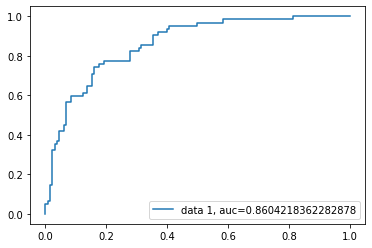

In [30]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


(150, 4)
y_values [0.00044721 0.00047662 0.00050796 0.00054136 0.00057696 0.0006149
 0.00065533 0.00069841 0.00074433 0.00079326]
is setosa [0 0 0 0 0 0 0 0 0 0]
[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]]


Text(0, 0.5, 'Probability is Setosa')

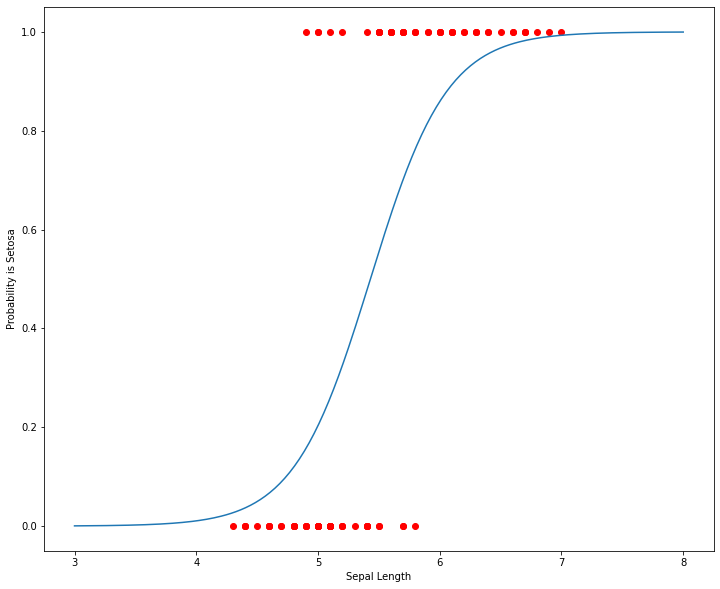

In [117]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.linear_model import LogisticRegression

data = datasets.load_iris()
print(data.data.shape)

lengths = data.data[:100, :1]
is_setosa = data.target[:100]

#fit model
lgs = LogisticRegression()
lgs.fit(lengths, is_setosa)
m = lgs.coef_[0,0]
b = lgs.intercept_[0]

#generate values for curve overlay
lgs_curve = lambda x: 1/(1 + math.e**(-(m*x+b)))
x_values = np.linspace(3, 8, 250)
y_values = lgs_curve(x_values)
print("y_values", y_values[:10])

print("is setosa", is_setosa[:10])

plt.figure(figsize=(12,10))
plt.plot(x_values, y_values)
print(lengths[:10])
plt.scatter(lengths, is_setosa, color='r')
plt.xlabel("Sepal Length")
plt.ylabel("Probability is Setosa")


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
y_values [1.87311730e-05 2.42062006e-05 3.12815010e-05 4.04247780e-05
 5.22404058e-05 6.75093521e-05 8.72407519e-05 1.12738527e-04
 1.45687427e-04 1.88264142e-04] 
x_values [2.         2.08080808 2.16161616 2.24242424 2.32323232 2.4040404
 2.48484848 2.56565657 2.64646465 2.72727273]
y_values [2.52021328e-06 3.41637357e-06 4.63119719e-06 6.27799557e-06
 8.51037080e-06 1.15365410e-05 1.56387588e-05 2.11996316e-05
 2.87377979e-05 3.89562816e-05] 
x_values [2.         2.08080808 2.16161616 2.24242424 2.32323232 2.4040404
 2.48484848 2.56565657 2.64646465 2.72727273]
y_values [9.00772862e-07 1.25141447e-06 1.73854923e-06 2.41530917e-06
 3.35550857e-06 4.66169459e-06 6.47633135e-06 8.99733719e-06
 1.24996688e-05 1.73653054e-05] 
x_values [2.         2.08080808 2.16161616 2.24242424 2.32323232 2.4040404
 2.48484848 2.56565657 2.64646465 2.72727273]
y_values [4.73474596e-07 6.67952964e-07 9.42312704e-07 1.3293

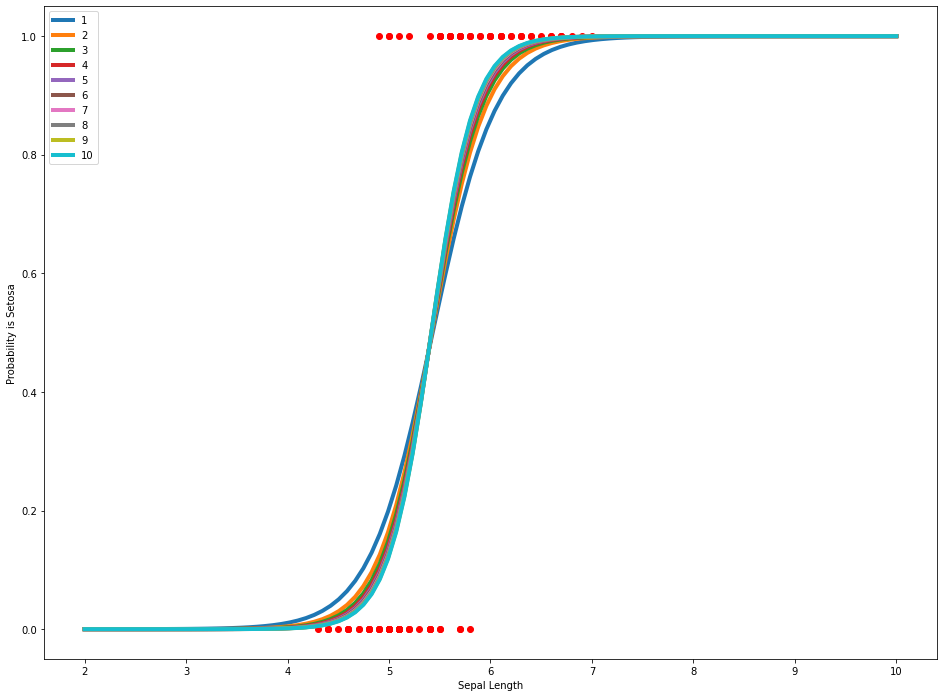

In [73]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression

data = datasets.load_iris()
# print(data.data)
# print(data.target)
lengths = data.data[:100, :1]
is_setosa = data.target[:100]

x_values = np.linspace(2, 10, 100)
x_test = np.reshape(x_values, (100,1))

C = list(range(1, 11))
print(C)
# labels = map(str, C)
labels = [str(i) for i in C]
print(labels)
plt.figure(figsize=(16,12))
for i in range(len(C)):
    lgs = LogisticRegression(C = C[i]) # pass a value for the regularization parameter C
    lgs.fit(lengths, is_setosa)
    y_values = lgs.predict_proba(x_test)[:,1] # use this function to compute probability directly
    # plot lines for different values of C more distinguishable
    print("y_values", y_values[:10], "\nx_values", x_values[:10])
    plt.plot(x_values, y_values, label=labels[i], lw=4)

print("x_train: ", lengths[:10], "y_train: ", is_setosa[:10])
plt.scatter(lengths, is_setosa, c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Probability is Setosa")
plt.legend()
plt.show()
